# EE 380L: Data Mining
## Assignment 4

Due: Mar 28 at 11:59 pm  
Total points: 50

You may work in pairs. Only one student per pair needs to submit the assignment on Canvas, but you should include names and UTEIDs for both students.

# Question 1: Decision Tree using Python (7 pts)
In this problem, you will model the data using decision trees to perform a classification task. Load the BreastTissue.csv dataset in the Q1 folder. The dataset has been preprocessed. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue). Using the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), build two different trees with a maximum depth of two using the split criteria (i) Gini and (ii) Entropy. Use entire data to build trees. Plot the two trees. If your classifier object is called clf, use the following commands to save the generated tree as a '.dot' file that can be used to visualize the tree using Webgraphviz: http://www.webgraphviz.com/

Hint: see  http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [13]:
from sklearn import tree
import pandas as pd
import numpy as np
original_data=pd.read_csv("Q1/BreastTissue.csv")
data=original_data.as_matrix()
data=data[:,1:]
Y=data[:,0]
X=data[:,1:]
clf_gini=tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
clf_gini.fit(X,Y)
clf_entropy=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf_entropy.fit(X,Y)
with open("decision_tree_gini.dot","w") as f:
    f=tree.export_graphviz(clf_gini,out_file=f)
with open("decision_tree_entropy.dot","w") as f:
    f=tree.export_graphviz(clf_entropy,out_file=f)


Copy paste the contents of your '.dot' file into the text window on the website to visualize the trees. At which node(s) do they differ?

# decision tree using gini criterion
![title](gini_tree.jpg)
# decision tree using entropy criterion
![title](entropy_tree.jpg)

# Answer
As we can see from the two trees, they actually differ at all nodes. gini based decision using two features and entropy based decision tree using three features. Although they both use the first and nineth feature to classify, the order of using the two features are different. 

# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

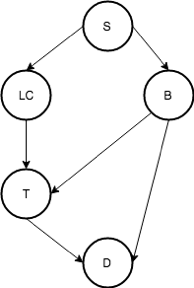

In [14]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')


$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

In [15]:
print '\nQ2(a)\n'
pd={0:[[0.9,0.7],[0.65,0.015]],1:[[0.1,0.3],[0.35,0.985]]}
pt={0:[[0.8,0.1],[0.5,0.04]],1:[[0.2,0.9],[0.5,0.96]]}
pb={0:[0.06,0.02],1:[0.94,0.98]}
plc={0:[0.03,0.01],1:[0.97,0.99]}
ps=[0.1,0.9]
sum=0
for i in range(2):
    for j in range(2):
        for u in range(2):
            for k in range(2):
                sum+=pd[0][i][j]*pt[i][j][u]*pb[j][k]*plc[u][k]*ps[k]
print 'Pr(D=yes)=',sum

print '\nQ2(b)\n'
sum=0
for i in range(2):
    j=0
    u=1
    for k in range(2):
        sum+=pd[0][i][j]*pt[i][j][u]*pb[j][k]*plc[u][k]*ps[k]
print 'Pr(D=yes,B=yes,LC=no)=',sum

print '\nQ2(c)\n'
#calculate Pr(B=yes,LC=no)
pblc=0 #p(B=yes,LC=no)
for d in range(2):
    for i in range(2):
        j=0
        u=1
        for k in range(2):
            pblc+=pd[d][i][j]*pt[i][j][u]*pb[j][k]*plc[u][k]*ps[k]
print 'Pr(B=yes,LC=no)=',pblc
print 'Pr(D=yes|B=yes,LC=no)=',sum/pblc

print '\nQ2(d)\n'
#calculate Pr(T=yes,S=yes)
p=0 
for d in range(2):
    for j in range(2):
        for u in range(2):
            i,k=0,0
            p+=pd[d][i][j]*pt[i][j][u]*pb[j][k]*plc[u][k]*ps[k]
print 'Pr(T=yes,S=yes)=',p
print 'Pr(T=yes|S=yes)=Pr(T=yes,S=yes)/Pr(S=yes)=',p/ps[0]


Q2(a)

Pr(D=yes)= 0.061313164

Q2(b)

Pr(D=yes,B=yes,LC=no)= 0.015957

Q2(c)

Pr(B=yes,LC=no)= 0.02364
Pr(D=yes|B=yes,LC=no)= 0.675

Q2(d)

Pr(T=yes,S=yes)= 0.0057832
Pr(T=yes|S=yes)=Pr(T=yes,S=yes)/Pr(S=yes)= 0.057832


Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

# Answer
(a) $$Pr(D,B,T,LC,S)=Pr(D|T,B)Pr(T|B,LC)Pr(B|S)Pr(LC|S)Pr(S)$$
$$Pr(D=yes)=\sum Pr(D=yes,B,T,LC,S)$$
    $$=0.061313164$$

(b) $$Pr(LC=no,B=yes,D=yes)=\sum Pr(LC=no,B=yes,D=yes,T,S)$$
    $$=0.01597$$

(c) $$Pr(D=yes|B=yes,T=yes)$$
$$=Pr(D=yes,B=yes,T=yes)/Pr(B=yes,T=yes)$$
    $$=0.675$$

(d) $$Pr(T=yes|S=yes)=Pr(T=yes,S=yes)/Pr(S=yes)$$
    $$=0.057832$$

# Question 3: Logistic Regression (10 pts)
In this question, we will explore the use of Logistic Regression. We use MAGIC Gamma Telescope Data Set. The dataset can be found at https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. It has 19020 instances with 11 attributes. The task is to classify the instance as signal (target = 1, positive) or background (target = 0, negative).
The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance.

(a) (6 pts) Fit a ridge logistic regression (i.e., logistic regression with a ridge penalty) model using scikit learn package. Use 10-fold cross-validation to choose the strength of the regularization ('C' parameter). Maintain all other parameters as default. Report the mean error rate (fraction of incorrect labels) on both the training and test sets.

(b) (4 pts) Plot the receiver operating characteristic (ROC) curve on the test data. Report the area under the ROC curve (AUC).

Hint: see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  and 

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html


Q3(a)

0.35938136638
The best C parameter is:  0.35938136638
0.211785956198
0.20380387367

Q3(b)



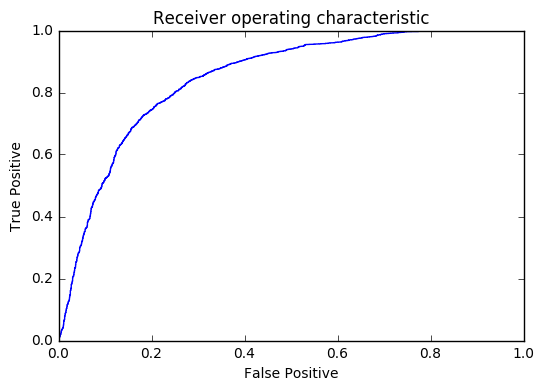

The area under the ROC is:  0.847398741589


In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,linear_model
from sklearn.model_selection import KFold

def label(tag):
    if tag=='h':
        return 0
    elif tag=='g':
        return 1
    else:
        return -1
    
def kFoldCV(n,X,Y,model):
    kf=KFold(n_splits=n)
    error_rates=[]
    for train,test in kf.split(X):
        model.fit(X[train],Y[train])
        error_rates.append(1-model.score(X[test],Y[test]))
    return np.mean(error_rates)

# (a)
print '\nQ3(a)\n'
data_train=pd.read_csv("Q3&Q4/magic_train.csv")
data_test=pd.read_csv("Q3&Q4/magic_test.csv")
train=data_train.as_matrix()
test=data_test.as_matrix()
X=train[:,:-1]
X=preprocessing.scale(X)
test_x=test[:,:-1]
test_x=preprocessing.scale(test_x)
test_y=np.asarray(map(label,test[:,-1]))
Y=np.asarray(map(label,train[:,-1]))
# C=np.linspace(0.0001,10,100)
# dic={}
# for c in C:
#     clf=linear_model.LogisticRegression(penalty='l2',C=c)
#     mean_error_rate=kFoldCV(10,X,Y,clf)
#     dic[c]=mean_error_rate
clf=linear_model.LogisticRegressionCV(cv=10)
clf.fit(X,Y)
print clf.C_[0]
# best_c=min(dic,key=dic.get)
best_c=clf.C_[0]
print 'The best C parameter is: ',best_c
clf=linear_model.LogisticRegression(penalty='l2',C=best_c)
clf.fit(X,Y)
train_error=1-clf.score(X,Y)
print train_error
test_error=1-clf.score(test_x,test_y)
print test_error

print '\nQ3(b)\n'
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
y_score = clf.decision_function(test_x)

# Compute ROC curve and ROC area 
fpr = []
tpr = []
fpr, tpr, _ = roc_curve(test_y, y_score)
plt.figure()
plt.plot(fpr,tpr,color='blue',label='ROC curve')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()
roc_auc = auc(fpr, tpr)
print 'The area under the ROC is: ',roc_auc

# Question 4: Support Vector Machines (14 pts)
(a) (6 pts) Apply a linear SVM (kernel = 'linear'), using the scikit-SVM (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) on the standardized MAGIC Gamma Telescope Data Set. The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance. Specify how you chose the cost penalty ('C' parameter) for the model. Maintain all other parameters as default. 

Hint: see http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier. (GridSearchCV is one way to select parameters for a model. You may use it in your answer, or you may use other ways to solve the problem.)

(b) (4 pts) Repeat (a) but using a Gaussian radial basis kernel (RBF kernel).

(c) (4 pts) Summarize the comparative performance (mean error rates on both the training and test sets) of all the classifiers (Ridge Logistic Regression, SVM with linear kernel, SVM with RBF kernel) that you applied to the MAGIC Gamma Telescope Data Set in this homework in a table. What do you conclude? (be brief)

In [18]:
from sklearn.svm import SVC
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
import pandas as pd

print '\nQ4(a)\n'
data_train=pd.read_csv("Q3&Q4/magic_train.csv")
data_test=pd.read_csv("Q3&Q4/magic_test.csv")
train=data_train.as_matrix()
test=data_test.as_matrix()
X=train[:,:-1]
X=preprocessing.scale(X)
test_x=test[:,:-1]
test_x=preprocessing.scale(test_x)
test_y=np.asarray(map(label,test[:,-1]))
Y=np.asarray(map(label,train[:,-1]))
C=np.linspace(1,10,10)
# dic={}
# for c in C:
#     clf=SVC(kernel='linear',C=c)
#     mean_error_rate=kFoldCV(10,X,Y,clf)
#     dic[c]=mean_error_rate
# best_c=min(dic,key=dic.get)
svc=SVC(kernel='linear')
params={'C':C}
clf=GridSearchCV(svc,params,cv=10)
clf.fit(X,Y)
best_c=clf.best_params_['C']
print 'The best C parameter is: ',best_c
clf=SVC(kernel='linear',C=best_c)
clf.fit(X,Y)
train_error=1-clf.score(X,Y)
print 'with linear kernel:\n'
print 'Training error rate is: ',train_error
test_error=1-clf.score(test_x,test_y)
print 'Testing error rate is: ',test_error
clf=SVC(kernel='rbf',C=best_c)
clf.fit(X,Y)
train_error=1-clf.score(X,Y)
print '\nQ4(b)'
print 'with rbf kernel:\n'
print 'training error rate is: ',train_error
test_error=1-clf.score(test_x,test_y)
print 'testing error rate is: ',test_error
print '\nQ4(c)\n'

print 'Classifier                 training error         testing error'
print 'Ridge logistic regression   0.211785956198        0.20380387367'
print 'SVM(kernel=linear)          0.212538571536        0.201361019019'
print 'SVM(kernel=rbf)             0.117031685106        0.129994765311'
print 'From the table, we can conclude that different model perform differently on same dataset, we need to'
print 'try different models and select the best one. For SVM, different kernels result in different error rate'
print 'in this problem, rbf outperfoms linear kernel. When we use SVM to model data, we need to try and select the best kernel'


Q4(a)

The best C parameter is:  5.0
with linear kernel:

Training error rate is:  0.212538571536
Testing error rate is:  0.201361019019

Q4(b)
with rbf kernel:

training error rate is:  0.117031685106
testing error rate is:  0.129994765311

Q4(c)

Classifier                 training error         testing error
Ridge logistic regression   0.211785956198        0.20380387367
SVM(kernel=linear)          0.212538571536        0.201361019019
SVM(kernel=rbf)             0.117031685106        0.129994765311
From the table, we can conclude that different model perform differently on same dataset, we need to
try different models and select the best one. For SVM, different kernels result in different error rate
in this problem, rbf outperfoms linear kernel. When we use SVM to model data, we need to try and select the best kernel


# Question 5:
(4 pts) What are two properties of Naïve Bayes that make it so suitable for parallel/distributed computation and for analyzing "streaming" data (e.g. each document is processed only once and need not be further stored or revisited).

# Answer

(1) All the attributes are independent among each other when class is given. So given the data, we could calculate the probability of each attribute in a particular class. 
(2) To  classify a new data point, we just need to update the pror and the conditional likelihood, and then calculate the posterior probability of this instance belonging to a specific class. If this posterior is greater than 0.5, this instance belongs to this specific class, otehrwise, it belongs to the other class. So, there is no need to do calculation based on all data points, which indicates it is suitable for analyzing streaming data.

# Question 6:
(5 pts) Receiver operating characteristic (ROC) are created by changing a  decision threshold (to decide when to classify an input as belonging to the positive class) in a binary classifier. While some classifiers yield a natural choice for threshold  by comparing with the (estimated value of the) posterior probability of the positive class given the input, other classifiers do not. Select one classifier among decision trees, K nearest neighbors, or support vector machines, and describe how the ROC curve can be drawn for the selected classifier. 

# Answer

In a ROC curve, the x-axis is FPR, y-axis is TPR. It is created by changing a decision threshold. For K nearest neighbors, the threshold here is the number of neighbors needed to classify an instance. For example, if we have 4-NN, we could make a rule: classify an instance as class 0 only 4 neighbors are class 0 or a less sensitive rule: classify an instance as class 0 only 3 neighbors are class 0, etc. By choosing different number of neighbors needed to classfify, then calculate the TPR and FPR respectively, we could draw the ROC curve. For multiclass problem, we could draw multiple curves, each curve for every two classes.  